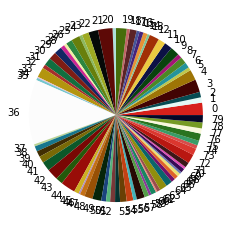

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.io import imread, imsave

def k_means_image(testimage, result, percentages, colors=80):
    imagen = imread(testimage)
    ancho, alto, _ = imagen.shape
    imagen = imagen.reshape((ancho*alto), 3)
    kmeans = KMeans(n_clusters=colors).fit(imagen)
    etiquetas = kmeans.predict(imagen)
    
    paleta_colores = np.array(kmeans.cluster_centers_).astype(int)
    imagen_nueva = np.copy(imagen)
    for i in range(len(imagen_nueva)):
        imagen_nueva[i] = paleta_colores[etiquetas[i]]

    imagen_nueva = imagen_nueva.reshape(ancho, alto, 3)
    imsave(result, imagen_nueva)

    labels = list(kmeans.labels_)
    centroides = kmeans.cluster_centers_
    porcentajes = []
    for i in range(len(centroides)):
        j = labels.count(i)
        j = j/len(labels)
        porcentajes.append(j)

    plt.pie(porcentajes, colors=np.array(centroides/255), labels=np.arange(len(centroides)))
    plt.savefig(percentages)

k_means_image('asd.jpg', 'k-means-result.jpg', 'k-means-result-percent.png')